In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

print(os.getcwd())

C:\Jupyter\BOAZ\mini_project


## Data 불러오기

#### train data

In [6]:
df_train = pd.read_csv('data/sales_train.csv')
df_train # 2935849개의 행

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


#### item data

In [7]:
df_items = pd.read_csv('data/items.csv')
df_items # item_id 22170개

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


#### item_category data

In [8]:
df_item_categories = pd.read_csv('data/item_categories.csv')
df_item_categories # item_category 84개

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


#### shop data

In [9]:
df_shops = pd.read_csv('data/shops.csv')
df_shops # shop 60개

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


#### test data

In [10]:
df_test = pd.read_csv('data/test.csv')
df_test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


### Null 확인

In [12]:
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [13]:
df_test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

* test, train data에 결측값 없음

### Outlier 확인

<AxesSubplot:xlabel='item_cnt_day'>

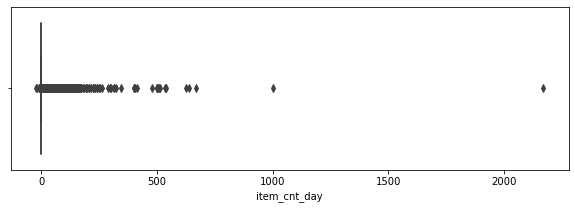

In [17]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=df_train)

<AxesSubplot:xlabel='item_price'>

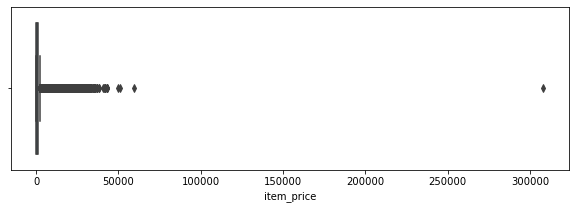

In [18]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_price', data=df_train)

* item_cnt_day 500이상
* item_price 50,000 이상 Outlier 제거

### 음수값 확인

In [19]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


* item_pirce, item_cnt_day 0 미만인 수 제거

### Outlier, 음수값 제거

In [22]:
df_train = df_train[df_train.item_cnt_day < 500]
df_train = df_train[df_train.item_price < 50000]

df_train = df_train[df_train.item_cnt_day >= 0]
df_train = df_train[df_train.item_price >= 0]

df_train # 2928475개의 행

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


### 중복 체크

In [24]:
sum(df_train.duplicated()), sum(df_test.duplicated())

(6, 0)

In [25]:
sum(df_items.duplicated()), sum(df_item_categories.duplicated()), sum(df_shops.duplicated())

(0, 0, 0)

* train data에만 중복된 행 6개 존재

In [26]:
df_train[df_train.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [27]:
# 중복 제거
df_train.drop_duplicates(inplace=True)

In [28]:
# 중복 재확인
sum(df_train.duplicated())

0

### test에는 존재, train에는 존재하지 않는 값

In [31]:
df_test.shop_id.value_counts()

2     5100
47    5100
37    5100
38    5100
39    5100
41    5100
42    5100
44    5100
45    5100
46    5100
48    5100
3     5100
49    5100
50    5100
52    5100
53    5100
55    5100
56    5100
57    5100
58    5100
36    5100
35    5100
34    5100
31    5100
4     5100
5     5100
6     5100
7     5100
10    5100
12    5100
14    5100
15    5100
16    5100
18    5100
19    5100
21    5100
22    5100
24    5100
25    5100
26    5100
28    5100
59    5100
Name: shop_id, dtype: int64

In [32]:
len(df_test.shop_id.unique())

42

* 총 42개의 shop_id가 있으며 각 shop_id마다 5,100개의 item이 있다.

In [34]:
len(set(df_test.item_id) - set(df_train.item_id))

363

* df_test에는 있지만 df_train에는 없는 item_id가 총 363개
* df_train에 모든 종류의 item이 있지는 않다는 것
* 363개의 item에 대해서는 0개가 판매된 것으로 예측?